In [56]:
import pandas as pd
import quandl
import math , datetime
import numpy as np
from sklearn import preprocessing , svm , cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df = quandl.get('WIKI/GOOGL')

#df.head()

df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
#df.head()

df['HC_%'] = df['Adj. High'] - df['Adj. Close'] / df['Adj. Close'] *100
df['%_change'] = df['Adj. Close'] - df['Adj. Open'] / df['Adj. Open'] *100

df = df[['Adj. Close' , 'HC_%' , '%_change' , 'Adj. Volume']]

#df.head()
df.fillna(-999999  , inplace = True)

forecast_col = 'Adj. Close'
forecast_out = int(math.ceil(0.01 * len(df)))   
# forecast the outcome of 50% of total df datas

df['label'] = df[forecast_col].shift(-forecast_out)
#len(df)
#label telling about the stock it would be if we jump upto forecast_out jumps into the future.
df.dropna(inplace = True)
df.head(34)

,Adj. Close,HC_%,%_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,-47.808891,-49.677158,44659000.0,69.639972
2004-08-20,54.322689,-45.291119,-45.677311,22834300.0,69.078238
2004-08-23,54.869377,-43.084307,-45.130623,18256100.0,67.839414
2004-08-24,52.597363,-44.027217,-47.402637,15247300.0,68.912727
2004-08-25,53.164113,-45.832791,-46.835887,9188600.0,70.668146
2004-08-26,54.122070,-45.857868,-45.877930,7094800.0,71.219849
2004-08-27,53.239345,-45.521831,-46.760655,6211700.0,72.278116
2004-08-30,51.162935,-47.091677,-48.837065,5196700.0,74.810934
2004-08-31,51.343492,-47.984433,-48.656508,4917800.0,74.199045


In [57]:
x = np.array(df.drop(['label'] , 1))
y = np.array(df['label'])
x = preprocessing.scale(x)


df.dropna(inplace = True)
#df.dropna(inplace = True)
x_lately = x[-forecast_out:]
#x = x[:-forecast_out]


#df.dropna(inplace = True)
y = np.array(df['label'])
print(len(x) , len(y))
import pickle

3327 3327


In [60]:
X_train , X_test , y_train , y_test = cross_validation.train_test_split(x , y , test_size = 0.9)

clf = LinearRegression(n_jobs=-1)

clf.fit(X_train , y_train)
accuracy_in_precicting_the_stock = clf.score(X_test , y_test)

with open('linearregression.pickle' , 'wb') as f:
    pickle.dump(clf , f)

pickle_in = open('linearregression.pickle' , 'rb')
clf = pickle.load(pickle_in)


#print(accuracy_in_precicting_the_stock * 100)

forecast_set = clf.predict(x_lately)            #next 30 days of stock prices

print(forecast_set , '\n' , accuracy_in_precicting_the_stock *100 ,'\n' , forecast_out)

[  943.2439681    955.20597016   964.44922351   962.67284338   957.35324633
   948.81609891   951.21416025   974.23866039   983.00462127   991.05508307
   978.71347258   991.26529252   980.43010234  1003.36179899  1012.48545274
  1005.53135182   999.81445373  1023.40115742  1020.46247266  1022.05404886
  1026.97763031  1027.97957909  1029.54607954  1016.85070099  1021.63810647
   989.05746029  1007.23756212  1008.55095267   998.83706277  1027.73161384
  1047.01221583  1046.42093612  1057.73763193  1060.75691994] 
 97.6441032353 
 34


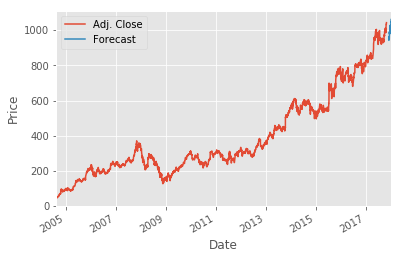

In [61]:
df['Forecast'] = np.nan
#df['Forecast']
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
#plt.plot(df['Adj. Close'] , df['Forecast'])
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
